In [2]:
import base64
import os
import boto3
import json
from IPython.display import Image

In [3]:
bedrock = boto3.client(service_name="bedrock-runtime", region_name="us-east-1")
modelId = 'anthropic.claude-v2'
accept = 'application/json'
contentType = 'application/json'

In [4]:
# NOTE: Body must same as following style
prompt = "Can you tell me how much is 2x2?"
claude_prompt = f"\n\nHuman:{prompt}\n\nAssistant:"
body = json.dumps({
                "prompt": claude_prompt,
                "temperature": 0.5,
                "top_p": 1,
                "top_k": 250,
                "max_tokens_to_sample": 200,
                "stop_sequences": ["\n\nHuman:"]
                })
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
print(response_body.get('completion'))

 Okay, let's solve this simple math problem:
2 x 2 = 4
Therefore, 2 x 2 equals 4.


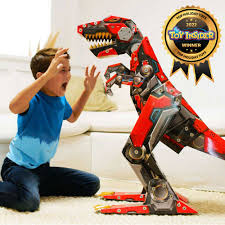

In [13]:

imagepath = r'C:\Users\jrliz\Downloads\t-rex3.jpg'
Image(filename=imagepath, width=300, height=300)

In [8]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

In [16]:

prompt = [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image(imagepath)}},
            {"type": "text", "text": "What dinosaur toy is in this picture?"}
        ]
claude_prompt = f"\n\nHuman:{prompt}\n\nAssistant:"
body = json.dumps({
                "prompt": claude_prompt,
                "temperature": 0.5,
                "top_p": 1,
                "top_k": 250,
                "max_tokens_to_sample": 200,
                "stop_sequences": ["\n\nHuman:"]
                })
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
print(response_body.get('completion'))


 Based on the image provided, this appears to be a toy model of a Tyrannosaurus rex dinosaur. The key identifying features are the large head with large jaws and teeth, short arms with two clawed fingers, thick and muscular body, long tail, and two strong hind limbs. The green coloration and sculpted scales are also typical for depictions of a T. rex.
